In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

In [2]:
furniture_df = pd.read_csv("furniture_data.csv")

furniture_sliding_df = pd.read_csv("furniture_sliding_data.csv")

full_furniture_df = pd.concat([furniture_df, furniture_sliding_df], axis=0)

In [3]:
print(full_furniture_df.shape)

(442308, 3)


In [4]:
full_furniture_df['Furniture_Category'].value_counts()

Furniture_Category
chairs      80415
sofas       80012
dressers    77193
beds        75159
tables      72155
lamps       57374
Name: count, dtype: int64

<Axes: xlabel='Furniture_Category'>

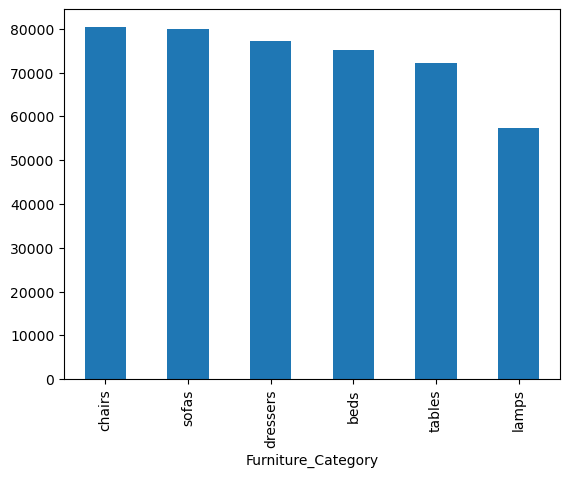

In [5]:
full_furniture_df['Furniture_Category'].value_counts().plot.bar()

In [6]:
full_furniture_df.groupby('Furniture_Category')['Furniture_Type'].value_counts()

Furniture_Category  Furniture_Type
beds                Victorian         5229
                    Farmhouse         5187
                    Southwestern      5145
                    Beach             5101
                    Asian             5044
                                      ... 
tables              Contemporary      3177
                    Industrial        2661
                    Modern            2272
                    Farmhouse         1279
                    Midcentury        1194
Name: count, Length: 102, dtype: int64

In [7]:
full_furniture_df['Furniture_Type'].value_counts()

Furniture_Type
Scandinavian     30801
Southwestern     30687
Eclectic         30245
Rustic           29454
Tropical         29057
Craftsman        27938
Beach            27858
Asian            27137
Mediterranean    26587
Victorian        26284
Midcentury       25648
Industrial       25471
Farmhouse        24761
Traditional      21847
Modern           21424
Transitional     19504
Contemporary     17605
Name: count, dtype: int64

<Axes: xlabel='Furniture_Type'>

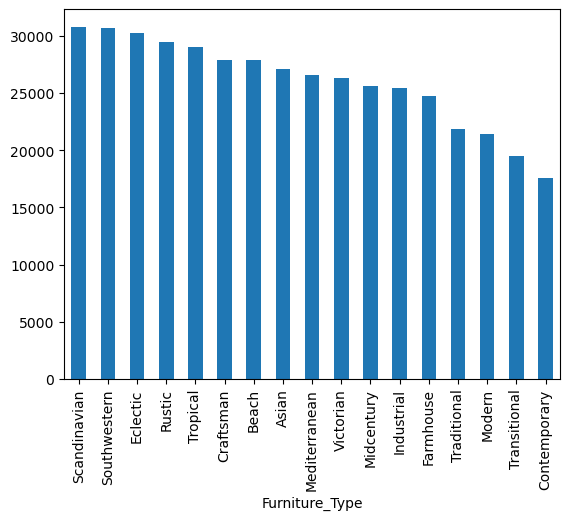

In [8]:
full_furniture_df['Furniture_Type'].value_counts().plot.bar()

In [9]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
full_furniture_df.groupby('Furniture_Category')['Furniture_Type'].value_counts()

Furniture_Category  Furniture_Type
beds                Victorian         5229
                    Farmhouse         5187
                    Southwestern      5145
                    Beach             5101
                    Asian             5044
                    Rustic            5019
                    Industrial        5002
                    Scandinavian      4983
                    Eclectic          4972
                    Modern            4940
                    Tropical          4895
                    Craftsman         4888
                    Mediterranean     4875
                    Midcentury        4810
                    Contemporary      1953
                    Transitional      1719
                    Traditional       1397
chairs              Farmhouse         6400
                    Scandinavian      5616
                    Craftsman         5460
                    Industrial        5340
                    Eclectic          5226
                   

<Axes: xlabel='Furniture_Category,Furniture_Type'>

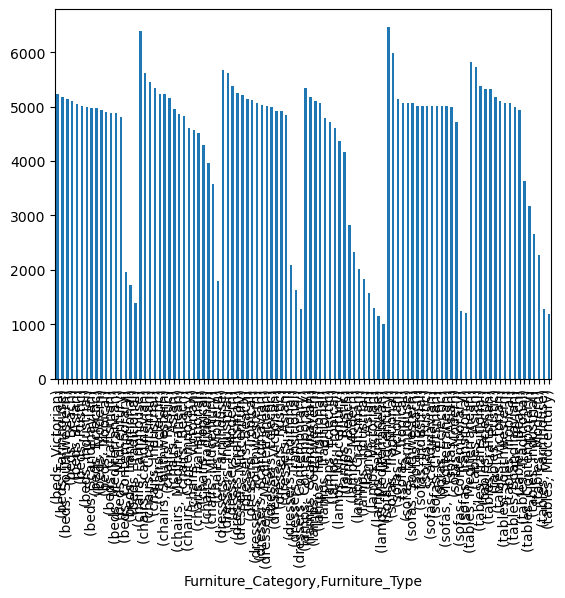

In [10]:
full_furniture_df.groupby('Furniture_Category')['Furniture_Type'].value_counts().plot.bar()

In [11]:
categorical_folders = furniture_df["Furniture_Category"].unique()
print(categorical_folders)

num_classes = furniture_df["Furniture_Category"].nunique()
print("Number of classes:", num_classes)

['beds' 'chairs' 'dressers' 'lamps' 'sofas' 'tables']
Number of classes: 6


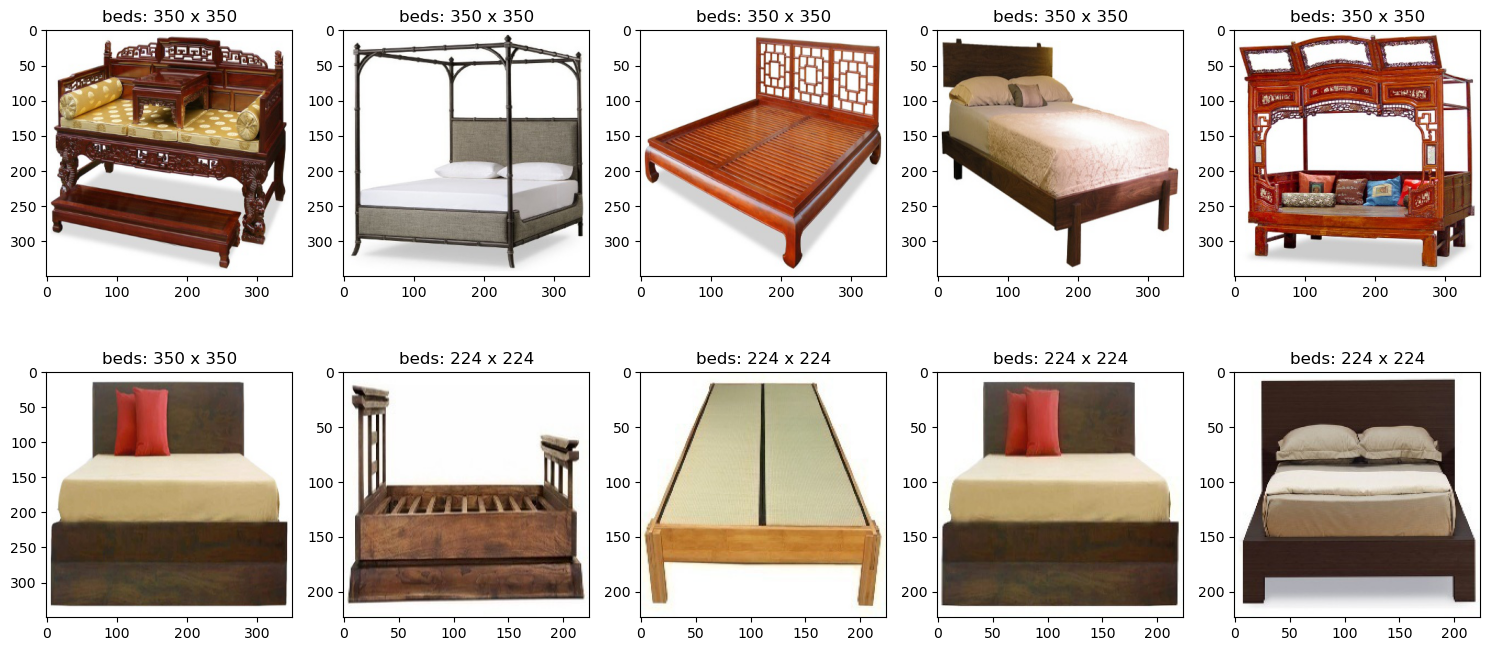

In [12]:
# Now you can use the updated file paths in your DataFrame
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))

for i, ax in enumerate(axes.flat):
    image_overview = Image.open(furniture_df.loc[i, "Image_Path"])
    ax.imshow(image_overview)
    
    width, height = image_overview.size
    ax.set_title(furniture_df.loc[i, "Furniture_Category"] + ": {} x {}".format(width, height))
plt.tight_layout()
plt.show()